# 1.在Windows中安装OpenCV-Python

- 如果python环境已安装pip，进入cmd命令行，输入pip install opencv-python
- 卸载opencv，输入pip uninstall opencv-python
- pip 安装速度慢或报错，可使用pip install opencv-python  -i https://pypi.tuna.tsinghua.edu.cn/simple ,采用镜像源加速

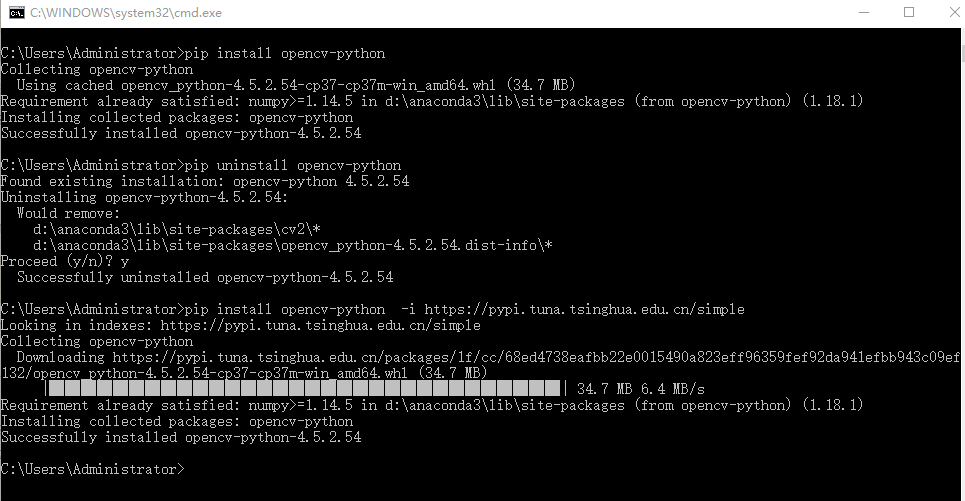

# 2.图像的基本操作

## 读取

In [1]:
# 导入包
import cv2

# 读取图像
img = cv2.imread("imgs/lenna.tif",cv2.IMREAD_COLOR)

# 显示图像
cv2.imshow("lenna",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imread():
第一个参数是**图片路径**，路径中包含中文字符图像会无法读取
第二个参数是**标志位**，*cv2.IMREAD_COLOR*： 加载彩色图像。任何图像的透明度都会被忽视。它是默认标志，*cv2.IMREAD_GRAYSCALE*：以灰度模式加载图像,*cv2.IMREAD_UNCHANGED*：加载图像，包括alpha通道;可以简单的用1,0，-1代替,注意：**cv2加载的图像通道为BGR**

cv2.imshow():第一个参数是**窗口名称**，它是一个字符串。第二个参数是**图片对象**。  
cv.waitKey():是一个键盘绑定函数，其参数是以毫秒为单位的时间，该函数等待任何键盘事件指定的毫秒，如果您在这段时间内按下任何键，程序将继续运行。如果**0**被传递，它将无限期地等待一次敲击键。

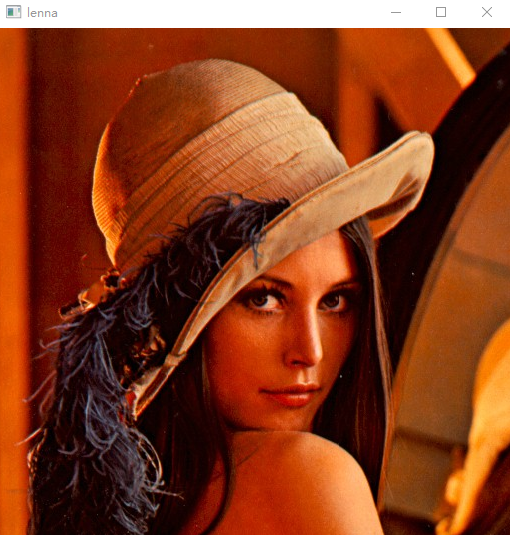

## 写入

In [2]:
#读取灰度图，并写入imgs文件夹下gray_lenna.tif
img = cv2.imread("imgs/lenna.tif",cv2.IMREAD_GRAYSCALE)
cv2.imwrite("imgs/gray_lenna.tif",img)

True

## 绘制图形

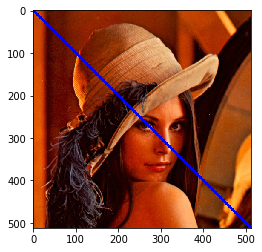

In [17]:
# 画线
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imgs/lenna.tif",1)
# 线的起点和终点坐标，线的颜色，粗细
img_line = cv2.line(img,(0,0),(img.shape[0],img.shape[1]),(255,0,0),5)
img_line_rgb = cv2.cvtColor(img_line, cv2.COLOR_BGR2RGB)
plt.imshow(img_line_rgb)

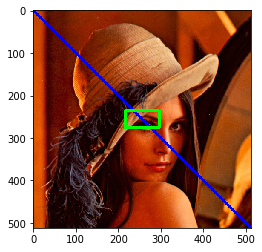

In [18]:
# 画矩形
img_rect = cv2.rectangle(img, (img.shape[0]//2-40,img.shape[1]//2-20),(img.shape[0]//2+40,img.shape[1]//2+20),(0,255,0),5)
img_rect_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rect_rgb)

绘制圆形：cv2.circle  
绘制椭圆：cv2.ellipse  
绘制多边形：cv2.polylines  
添加文本：cv2.putText

# 3.视频的基本操作

## 从摄像机读取图片

要捕获视频，需要创建一个 VideoCapture 对象，它的参数可以是**设备索引**或**视频文件**的名称，设备索引就是指定哪个摄像头的数字。正常情况下，一个摄像头会被连接可以简单地传0(或-1)。你可以通过传递1来选择第二个相机，以此类推。在此之后，你可以逐帧捕获。但是在最后，需要将其释放。

In [4]:
# 读取摄像机图像，将其转换为灰度图并显示
import cv2
cap = cv2.VideoCapture(0)
# 读取视频文件时cv.VideoCapture('vtest.avi')，参数更改为视频文件的路径即可
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow("frame",gray)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows

Cannot open camera
Cannot receive frame


<function destroyAllWindows>

## 保存视频文件

捕捉一个视频，一帧一帧地处理，想要保存这个视频，对于图像，非常简单，只需使用 cv.imwrite()。而保存视频首先需要创建一个 VideoWriter 对象，指定输出文件名(例如: output.avi)。然后指定 FourCC 代码，然后传递帧率的数量和图像大小。  
FourCC：是用于指定视频编解码器的4字节代码。可用代码列表可在fourcc.org中:http://www.fourcc.org/codecs.php 找到，包含DIVX，XVID，MJPG，X264，WMV1，WMV2等。

In [5]:
import cv2
cap = cv2.VideoCapture(0)
# 定义编解码器并创建VideoWriter对象
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('imgs/output.avi', fourcc, 20.0, (640,  480))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame")
        break
    frame = cv2.flip(frame, 0)
    # 写翻转的框架
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
# 完成工作后释放所有内容
cap.release()
out.release()
cv2.destroyAllWindows()

# 图像处理

In [24]:
img = cv2.imread("imgs/lenna.tif",1)

### 均值滤波

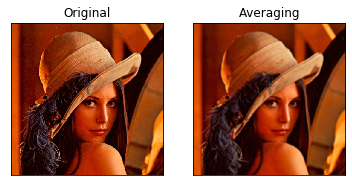

In [26]:
# 5x5卷积核
kernel = np.ones((5,5), np.float32)/25
dst = cv2.filter2D(img, -1, kernel)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img_rgb),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_rgb),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

### 高斯模糊

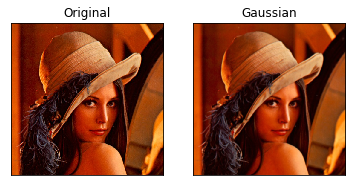

In [28]:
blur = cv2.GaussianBlur(img,(5,5),0)

blur_rgb = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img_rgb),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur_rgb),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
plt.show()

### 图像梯度

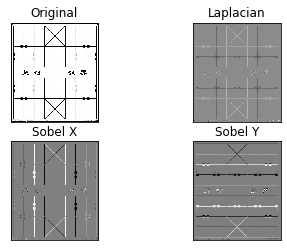

In [34]:
img = cv2.imread("imgs/qipan.jpg",0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()